In [4]:
# Importing libraries

import requests
from datetime import datetime
import traceback
import json
import sys
import praw
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
import arrow

In [2]:
# Scraping data for subreddit "r/emacs" [01/01/2020 - 03/01/2020]

def downloadSubreddit(filename, subreddit, start_time, end_time):
    submissions = []
    count = 0
    submissions_with_metrics = []
    previous_epoch = int(start_time.timestamp())
    after_epoch = int(end_time.timestamp())
    print(after_epoch)
    print(previous_epoch)
    
    
    url = 'https://api.pushshift.io/reddit/submission/search/?subreddit={}&after={}&before={}&sort=desc&limit=1000'
    reddit = praw.Reddit(client_id='_87SCviJLvIICA', client_secret='yio0cnfuq97lMDQRPfvXSfje-O-z_Q', user_agent='redditdataanalysis')
    
    while True:
        new_url = url.format(subreddit, after_epoch, previous_epoch)
        json_text = requests.get(new_url, headers={'User-Agent': "Post downloader by /u/nsajnani"})
        time.sleep(1)  # pushshift has a rate limit, if we send requests too fast it will start returning error messages
        try:
            json_data = json_text.json()
        except json.decoder.JSONDecodeError:
            time.sleep(1)
            continue

        if 'data' not in json_data:
            break
        objects = json_data['data']
        if len(objects) == 0:
            break

        for object in objects:
            previous_epoch = object['created_utc'] - 1
            count += 1
            praw_submission = reddit.submission(id=object['id'])
            submissions_with_metrics.append([praw_submission.author, praw_submission.title, praw_submission.upvote_ratio, praw_submission.is_original_content, praw_submission.edited, praw_submission.score, praw_submission.id, praw_submission.subreddit, praw_submission.url, praw_submission.num_comments, praw_submission.selftext, praw_submission.created])


        print("Saved {} submissions through {}".format(count, datetime.fromtimestamp(previous_epoch).strftime("%Y-%m-%d")))

    print(f"Saved {count} submissions")
    submissions_with_metrics = pd.DataFrame(submissions_with_metrics,columns=['author','title', 'upvote_ratio','is_original_content','edited','score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    submissions_with_metrics.to_csv(filename, index=False)


downloadSubreddit("submissions_with_metrics_emacs.csv", "emacs", datetime(2020, 3, 1), datetime(2020, 1, 1))


1577817000
1583001000
Saved 100 submissions through 2020-02-23
Saved 200 submissions through 2020-02-16
Saved 300 submissions through 2020-02-09
Saved 400 submissions through 2020-02-01
Saved 500 submissions through 2020-01-27
Saved 600 submissions through 2020-01-21
Saved 700 submissions through 2020-01-14
Saved 800 submissions through 2020-01-07
Saved 900 submissions through 2020-01-01
Saved 903 submissions through 2020-01-01
Saved 903 submissions


In [3]:
# Scraping data for subreddit "r/vim" [01/01/2020 - 03/01/2020]

def downloadSubreddit(filename, subreddit, start_time, end_time):
    submissions = []
    count = 0
    submissions_with_metrics = []
    previous_epoch = int(start_time.timestamp())
    after_epoch = int(end_time.timestamp())
    print(after_epoch)
    print(previous_epoch)
    
    
    url = 'https://api.pushshift.io/reddit/submission/search/?subreddit={}&after={}&before={}&sort=desc&limit=1000'
    reddit = praw.Reddit(client_id='_87SCviJLvIICA', client_secret='yio0cnfuq97lMDQRPfvXSfje-O-z_Q', user_agent='redditdataanalysis')
    
    while True:
        new_url = url.format(subreddit, after_epoch, previous_epoch)
        json_text = requests.get(new_url, headers={'User-Agent': "Post downloader by /u/nsajnani"})
        time.sleep(1)  # pushshift has a rate limit, if we send requests too fast it will start returning error messages
        try:
            json_data = json_text.json()
        except json.decoder.JSONDecodeError:
            time.sleep(1)
            continue

        if 'data' not in json_data:
            break
        objects = json_data['data']
        if len(objects) == 0:
            break

        for object in objects:
            previous_epoch = object['created_utc'] - 1
            count += 1
            praw_submission = reddit.submission(id=object['id'])
            submissions_with_metrics.append([praw_submission.author, praw_submission.title, praw_submission.upvote_ratio, praw_submission.is_original_content, praw_submission.edited, praw_submission.score, praw_submission.id, praw_submission.subreddit, praw_submission.url, praw_submission.num_comments, praw_submission.selftext, praw_submission.created])


        print("Saved {} submissions through {}".format(count, datetime.fromtimestamp(previous_epoch).strftime("%Y-%m-%d")))

    print(f"Saved {count} submissions")
    submissions_with_metrics = pd.DataFrame(submissions_with_metrics,columns=['author','title', 'upvote_ratio','is_original_content','edited','score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    submissions_with_metrics.to_csv(filename, index=False)


downloadSubreddit("submissions_with_metrics_vim.csv", "vim", datetime(2020, 3, 1), datetime(2020, 1, 1))


1577817000
1583001000
Saved 100 submissions through 2020-02-22
Saved 200 submissions through 2020-02-14
Saved 300 submissions through 2020-02-06
Saved 400 submissions through 2020-01-28
Saved 500 submissions through 2020-01-21
Saved 600 submissions through 2020-01-13
Saved 700 submissions through 2020-01-04
Saved 733 submissions through 2020-01-01
Saved 733 submissions


In [7]:
# Reading CSV files into dataframes

df_emacs = pd.read_csv("submissions_with_metrics_emacs.csv") 
df_vim = pd.read_csv("submissions_with_metrics_vim.csv")

In [8]:
print("Data for subreddit 'emacs'")
df_emacs.head()

Data for subreddit 'emacs'


,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created
0,NaN,"Emacs 27, org mode undesired pair for <.",1.00,False,False,14,fbggoy,emacs,https://www.reddit.com/r/emacs/comments/fbggoy...,11,[deleted],1.583029e+09
1,lorawpreisserwp,New Videos,1.00,False,False,1,fbe0ps,emacs,https://tube-casino.com/,0,NaN,1.583019e+09
2,bhanuvrat,Can mu server be configured to use more than o...,0.91,False,False,9,fbd8rt,emacs,https://www.reddit.com/r/emacs/comments/fbd8rt...,11,Hi \n\nI found mu4e struggling to search throu...,1.583015e+09
3,NaN,[REQUEST] Can anyone port Rouge to Emacs?,0.56,False,False,1,fbbooz,emacs,https://www.reddit.com/r/emacs/comments/fbbooz...,5,&#x200B;\n\nhttps://preview.redd.it/wqk50urotu...,1.583007e+09
4,fctorial,Smooth scrolling in emacs,0.87,False,False,19,fbb83r,emacs,https://www.reddit.com/r/emacs/comments/fbb83r...,2,Is there any way to have emacs scroll text buf...,1.583004e+09


In [9]:
print("Data for subreddit 'vim'")
df_vim.head()

Data for subreddit 'vim'


,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created
0,dog_superiority,Menu for selecting buffer?,0.86,False,False,5,fbdbja,vim,https://www.reddit.com/r/vim/comments/fbdbja/m...,11,"I thought I was able to do this in the past, b...",1.583016e+09
1,axvr,Zepl.vim: A lightweight REPL integration plugi...,0.93,False,1583021012.0,53,fbc6l1,vim,https://www.reddit.com/r/vim/comments/fbc6l1/z...,21,"Over the past couple of weeks, I've been worki...",1.583010e+09
2,NaN,Zepl.vim: A lightweight REPL integration plugi...,1.00,False,False,1,fbc69p,vim,https://www.reddit.com/r/vim/comments/fbc69p/z...,0,[deleted],1.583010e+09
3,NaN,Zepl.vim: A lightweight REPL integration plugi...,1.00,False,False,1,fbc4l6,vim,https://www.reddit.com/r/vim/comments/fbc4l6/z...,0,[deleted],1.583010e+09
4,Segeljaktus,vim-isotope 2.0 - Insert and attach special ch...,0.96,False,1582986672.0,67,fbbna6,vim,https://www.reddit.com/r/vim/comments/fbbna6/v...,9,&#x200B;\n\nhttps://preview.redd.it/i23jcg0iiv...,1.583007e+09


Length of Data (emacs) : 903
Length of Data (vim) : 733


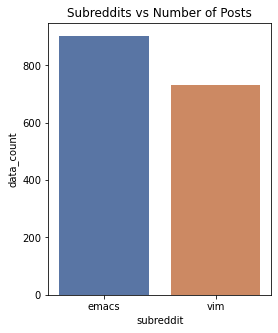

In [10]:
print("Length of Data (emacs) : " + str(len(df_emacs)))
print("Length of Data (vim) : " + str(len(df_vim)))

data = [['emacs', len(df_emacs)], ['vim', len(df_vim)]] 
df = pd.DataFrame(data, columns = ['subreddit', 'data_count'])

# Plotting number of posts in subreddits emacs and vim 

plt.figure(figsize=(4,5))
ax = sns.barplot(x="subreddit", y="data_count", data=df, palette="deep").set_title("Subreddits vs Number of Posts")

Number of Distinct Authors in 'emacs' : 470
Number of Distinct Authors in 'vim'   : 437


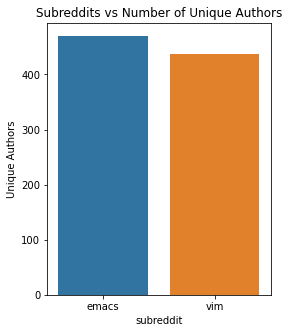

In [11]:
print("Number of Distinct Authors in 'emacs' : " + str(df_emacs['author'].nunique()))
print("Number of Distinct Authors in 'vim'   : " + str(df_vim['author'].nunique()))

data = [['emacs', df_emacs['author'].nunique()], ['vim', df_vim['author'].nunique()]] 
df = pd.DataFrame(data, columns = ['subreddit', 'Unique Authors'])

# Plotting number of posts in subreddits emacs and vim 

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,5))
ax = sns.barplot(x="subreddit", y="Unique Authors", data=df).set_title("Subreddits vs Number of Unique Authors")

Highest number of comments on emacs posts : 170


Text(0.5, 1.0, 'EMACS - Distribution of comments')

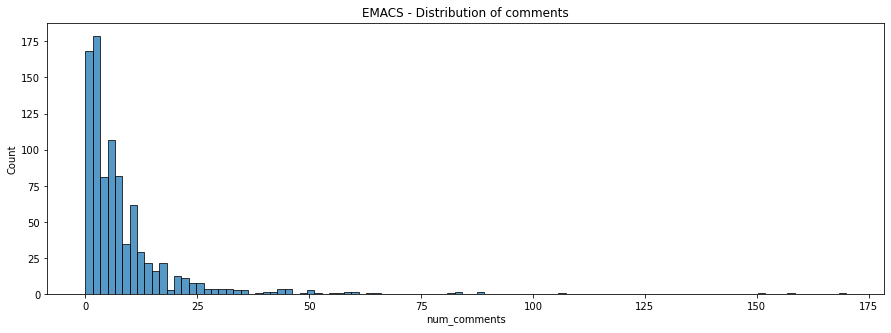

In [12]:
# Comments distribution in emacs subreddit

print("Highest number of comments on emacs posts : " + str(max(df_emacs['num_comments'])))

plt.figure(figsize=(15,5))
sns.histplot(data=df_emacs, x="num_comments").set_title("EMACS - Distribution of comments")

Highest number of comments on vim Posts : 195


Text(0.5, 1.0, 'VIM - Distribution of comments')

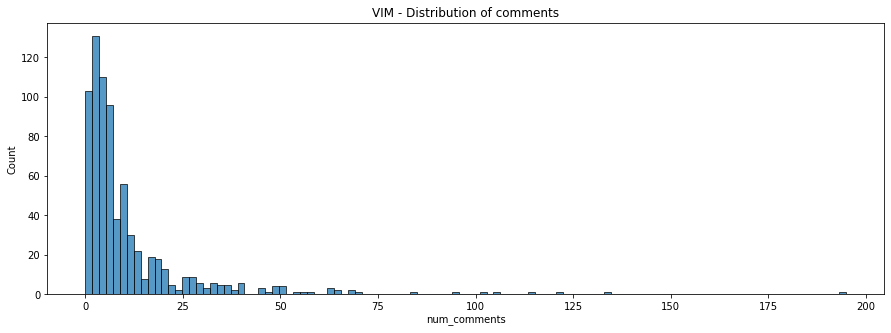

In [13]:
# Comments distribution in vim subreddit

print("Highest number of comments on vim Posts : " + str(max(df_vim['num_comments'])))

plt.figure(figsize=(15,5))
sns.histplot(data=df_vim, x="num_comments").set_title("VIM - Distribution of comments")

Text(0.5, 1.0, 'EMACS - Distribution of Score')

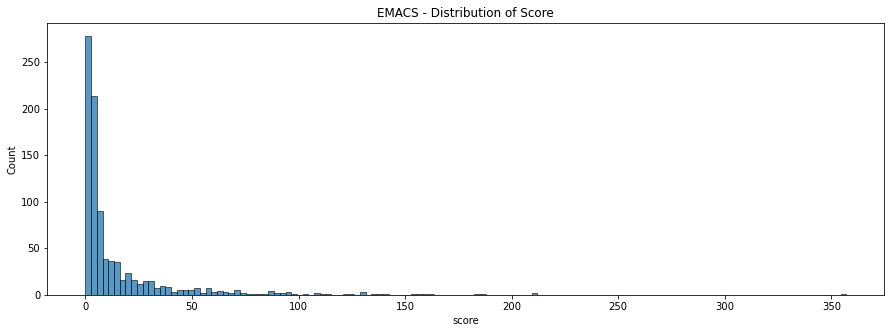

In [14]:
# Score distribution in emacs subreddit


plt.figure(figsize=(15,5))
sns.histplot(data=df_emacs, x="score").set_title("EMACS - Distribution of Score")

Highest number of score on VIM posts : 751


Text(0.5, 1.0, 'VIM - Distribution of Score')

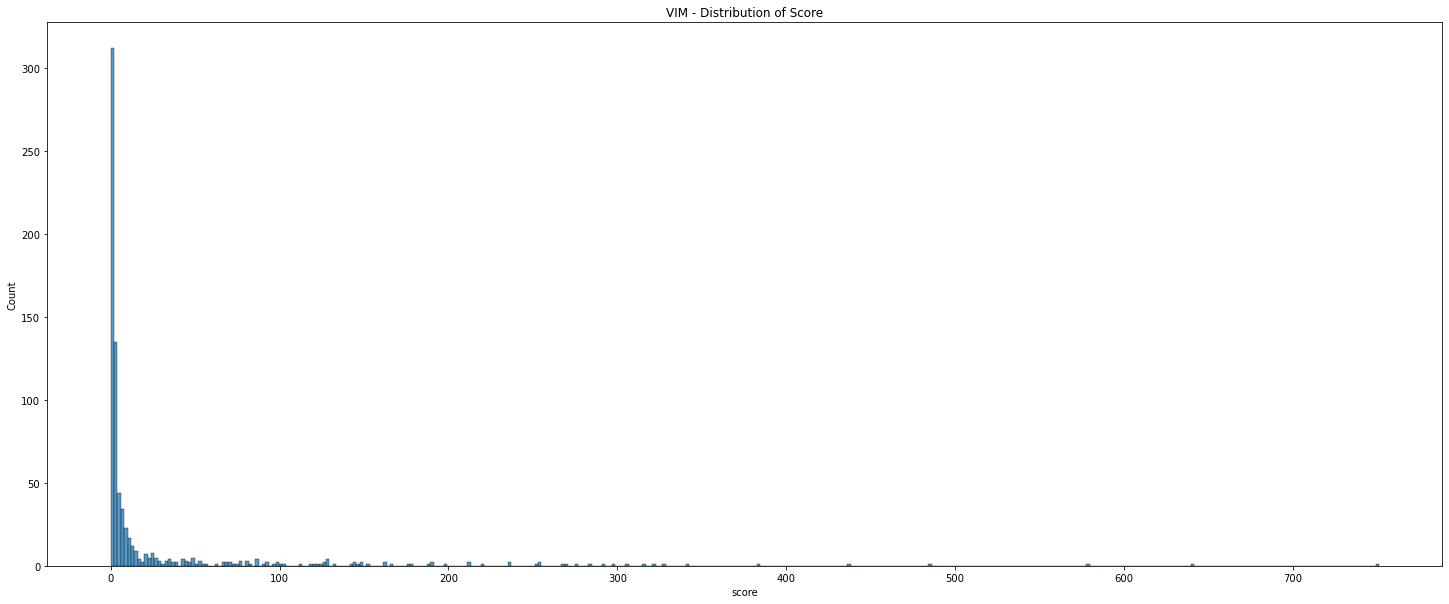

In [15]:
# Score distribution in Vim subreddit

print("Highest number of score on VIM posts : " + str(max(df_vim['score'])))

plt.figure(figsize=(25,10))
sns.histplot(data=df_vim, x="score").set_title("VIM - Distribution of Score")

In [27]:
# Replacing not false values in coloumn 'edited' with "True"

for num in range(len(df_emacs['edited'])):
    if df_emacs['edited'][num] != 'False':
        df_emacs['edited'][num] = 'True'
        
for num in range(len(df_vim['edited'])):
    if df_vim['edited'][num] != 'False':
        df_vim['edited'][num] = 'True'

In [17]:
data = [['emacs',df_emacs.loc[df_emacs.edited == 'True', 'edited'].count(), df_emacs.loc[df_emacs.edited == 'False', 'edited'].count()], ['vim', df_vim.loc[df_vim.edited == 'True', 'edited'].count(), df_vim.loc[df_vim.edited == 'False', 'edited'].count()]] 
df = pd.DataFrame(data, columns = ['subreddit', 'Edited Posts', 'Not Edited Posts'])

In [18]:
((df['Edited Posts'][0])/(df['Edited Posts'][0] + df['Not Edited Posts'][0]))*100

18.826135105204873

EMACS - % of edited posts : 18.826135105204873
VIM   - % of edited posts : 14.461118690313779


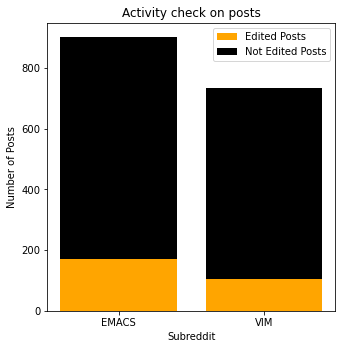

In [19]:
print("EMACS - % of edited posts : " + str(((df['Edited Posts'][0])/(df['Edited Posts'][0] + df['Not Edited Posts'][0]))*100))
print("VIM   - % of edited posts : " + str(((df['Edited Posts'][1])/(df['Edited Posts'][1] + df['Not Edited Posts'][1]))*100))

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(['EMACS', 'VIM'], df['Edited Posts'], color='orange')
ax.bar(['EMACS', 'VIM'], df['Not Edited Posts'], bottom=df['Edited Posts'], color='black')
ax.set_ylabel('Number of Posts')
ax.set_xlabel('Subreddit')
ax.set_title('Activity check on posts')
ax.legend(labels=['Edited Posts', 'Not Edited Posts'])

In [20]:
# Average upvote ratio for 'emacs' subreddit
emacs_avg_upvote_ratio = sum(df_emacs['upvote_ratio']) / len(df_emacs['upvote_ratio'])
print("Average Upvote Ratio for EMACS : " + str(emacs_avg_upvote_ratio))

# Average upvote ratio for 'vim' subreddit
vim_avg_upvote_ratio = sum(df_vim['upvote_ratio']) / len(df_vim['upvote_ratio'])
print("Average Upvote Ratio for VIM   : " + str(vim_avg_upvote_ratio))

Average Upvote Ratio for EMACS : 0.9170210409745306
Average Upvote Ratio for VIM   : 0.7504502046384726


In [62]:
# Average score for 'emacs' subreddit
emacs_avg_score = sum(df_emacs['score']) / len(df_emacs['score'])
print("Average Score for EMACS : " + str(emacs_avg_score))

# Average score for 'vim' subreddit
vim_avg_score = sum(df_vim['score']) / len(df_vim['score'])
print("Average Score for VIM   : " + str(vim_avg_score))

Average Score for EMACS : 15.571428571428571
Average Score for VIM   : 25.346521145975444


In [21]:
num_to_month = {'01':'January', '02':'February', '03':'March', '04':'April', '06':'June', '07':'July', '08':'August', '09':'September', '10':'October', '11':'November', '12':'December'}

# EMACS ------------------------------------

month_created = []
for num in range(len(df_emacs['created'])):
    utc_date = df_emacs['created'][num]
    month_created.append(num_to_month[str(arrow.get(utc_date).to('local').format())[5:7]])

# Adding 'month_created' column to df_emacs
df_emacs['month_created'] = month_created


# Vim ---------------------------------------

month_created = []
for num in range(len(df_vim['created'])):
    utc_date = df_vim['created'][num]
    month_created.append(num_to_month[str(arrow.get(utc_date).to('local').format())[5:7]])

# Adding 'month_created' column to df_emacs
df_vim['month_created'] = month_created

In [22]:
# df_emacs - updated dataframe

df_emacs.head()

,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created,month_created
0,NaN,"Emacs 27, org mode undesired pair for <.",1.00,False,False,14,fbggoy,emacs,https://www.reddit.com/r/emacs/comments/fbggoy...,11,[deleted],1.583029e+09,March
1,lorawpreisserwp,New Videos,1.00,False,False,1,fbe0ps,emacs,https://tube-casino.com/,0,NaN,1.583019e+09,March
2,bhanuvrat,Can mu server be configured to use more than o...,0.91,False,False,9,fbd8rt,emacs,https://www.reddit.com/r/emacs/comments/fbd8rt...,11,Hi \n\nI found mu4e struggling to search throu...,1.583015e+09,March
3,NaN,[REQUEST] Can anyone port Rouge to Emacs?,0.56,False,False,1,fbbooz,emacs,https://www.reddit.com/r/emacs/comments/fbbooz...,5,&#x200B;\n\nhttps://preview.redd.it/wqk50urotu...,1.583007e+09,March
4,fctorial,Smooth scrolling in emacs,0.87,False,False,19,fbb83r,emacs,https://www.reddit.com/r/emacs/comments/fbb83r...,2,Is there any way to have emacs scroll text buf...,1.583004e+09,March


In [23]:
# df_vim - updated dataframe

df_vim.head()

,author,title,upvote_ratio,is_original_content,edited,score,id,subreddit,url,num_comments,body,created,month_created
0,dog_superiority,Menu for selecting buffer?,0.86,False,False,5,fbdbja,vim,https://www.reddit.com/r/vim/comments/fbdbja/m...,11,"I thought I was able to do this in the past, b...",1.583016e+09,March
1,axvr,Zepl.vim: A lightweight REPL integration plugi...,0.93,False,True,53,fbc6l1,vim,https://www.reddit.com/r/vim/comments/fbc6l1/z...,21,"Over the past couple of weeks, I've been worki...",1.583010e+09,March
2,NaN,Zepl.vim: A lightweight REPL integration plugi...,1.00,False,False,1,fbc69p,vim,https://www.reddit.com/r/vim/comments/fbc69p/z...,0,[deleted],1.583010e+09,March
3,NaN,Zepl.vim: A lightweight REPL integration plugi...,1.00,False,False,1,fbc4l6,vim,https://www.reddit.com/r/vim/comments/fbc4l6/z...,0,[deleted],1.583010e+09,March
4,Segeljaktus,vim-isotope 2.0 - Insert and attach special ch...,0.96,False,True,67,fbbna6,vim,https://www.reddit.com/r/vim/comments/fbbna6/v...,9,&#x200B;\n\nhttps://preview.redd.it/i23jcg0iiv...,1.583007e+09,March


EMACS - Number of Posts / Month : 

January     486
February    411
March         6
Name: month_created, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000032EF0E1160>],
      dtype=object)

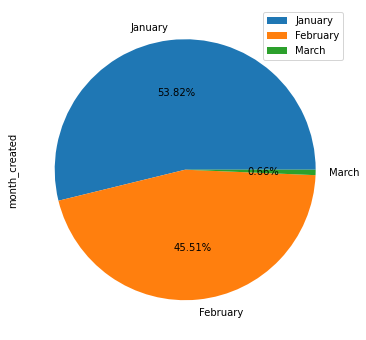

In [24]:
# Distribution of posts in r/emacs per month [jan-feb-march]

print("EMACS - Number of Posts / Month : \n")
print(df_emacs['month_created'].value_counts())

df_emacs['month_created'].value_counts().to_frame().plot.pie(autopct="%.2f%%", subplots=True, figsize=(11, 6))

VIM - Number of Posts / Month : 

January     377
February    351
March         5
Name: month_created, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000032EF139100>],
      dtype=object)

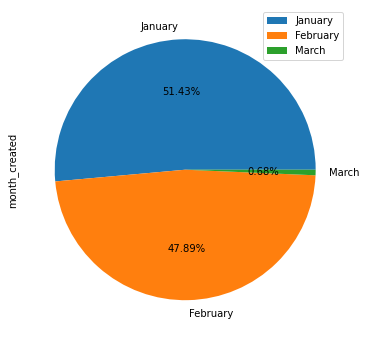

In [25]:
# Distribution of posts in r/vim per month [jan-feb-march]

print("VIM - Number of Posts / Month : \n")
print(df_vim['month_created'].value_counts())

df_vim['month_created'].value_counts().to_frame().plot.pie(autopct="%.2f%%", subplots=True, figsize=(11, 6))

In [43]:
VIM = df_vim['month_created'].value_counts().tolist()
#VIM['January']
#VIM = VIM.reset_index(drop=True)
#print(VIM['0'])
VIM

[377, 351, 5]

Text(0.5, 1.0, 'Monthwise Comparision of Posts [emacs - vim]')

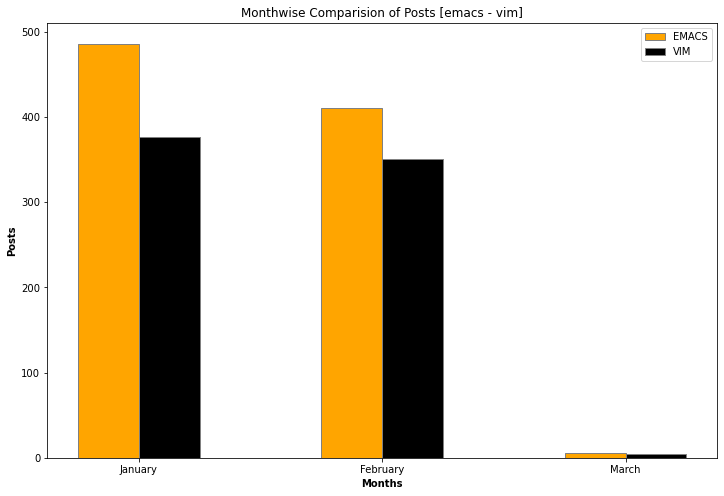

In [54]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, df_emacs['month_created'].value_counts().tolist(), color ='orange', width = barWidth, 
        edgecolor ='grey', label ='EMACS') 
plt.bar(br2, df_vim['month_created'].value_counts().tolist(), color ='black', width = barWidth, 
        edgecolor ='grey', label ='VIM')

plt.xlabel('Months', fontweight ='bold') 
plt.ylabel('Posts', fontweight ='bold') 
plt.xticks([r + barWidth - 0.125 for r in range(len(df_vim['month_created'].value_counts().tolist()))], 
           ['January', 'February', 'March'])
plt.legend(labels=['EMACS', 'VIM']) 
plt.title("Monthwise Comparision of Posts [emacs - vim]")

In [58]:
#Checking if there are any common authors between emacs and vim

emacs_authors = df_emacs['author'].unique()
vim_authors = df_vim['author'].unique()

print("EMACS - Number of authors : " + str(len(emacs_authors)))
print("VIM - Number of authors   : " + str(len(vim_authors)) + "\n\n")

cnt = 0
print("Common authors : ")
for author_name in emacs_authors:
    if author_name in vim_authors:
        cnt += 1
        print(author_name)
        
print("\nNumber of Common Authors : " + str(cnt))

EMACS - Number of authors : 471
VIM - Number of authors   : 438


Common authors : 
aksh2161989
en3r0
tldrthestoryofmylife
Reasintper
ghostinzshell
l33tpolymath
kakiopolis
Martinsos
Godnyx117
ellipticcode0
eva_kuator
yep808
Oracolus
akulichevskiy
joselitux

Number of Common Authors : 15


In [63]:
# Counting the number of comments in each subreddit

print("EMACS - Number of comments : " + str(sum(df_emacs['num_comments'])))
print("VIM - Number of comments   : " + str(sum(df_vim['num_comments'])))

# Average comments for each subreddit

print("\n\nEMACS - Average comments : " + str(sum(df_emacs['num_comments'])//len(df_emacs['num_comments'])))
print("VIM - Average comments   : " + str(sum(df_vim['num_comments'])//len(df_vim['num_comments'])))

EMACS - Number of comments : 8247
VIM - Number of comments   : 7959


EMACS - Average comments : 9
VIM - Average comments   : 10
